In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'difficulty'
]
train_df = pd.read_csv(r'/content/extracted_data/nsl-kdd/KDDTrain+.txt', header=None, names=column_names)
train_df.drop(['difficulty'], axis=1, inplace=True)
train_df['attack_binary'] = train_df['class'].apply(lambda x: 0 if x == 'normal' else 1)

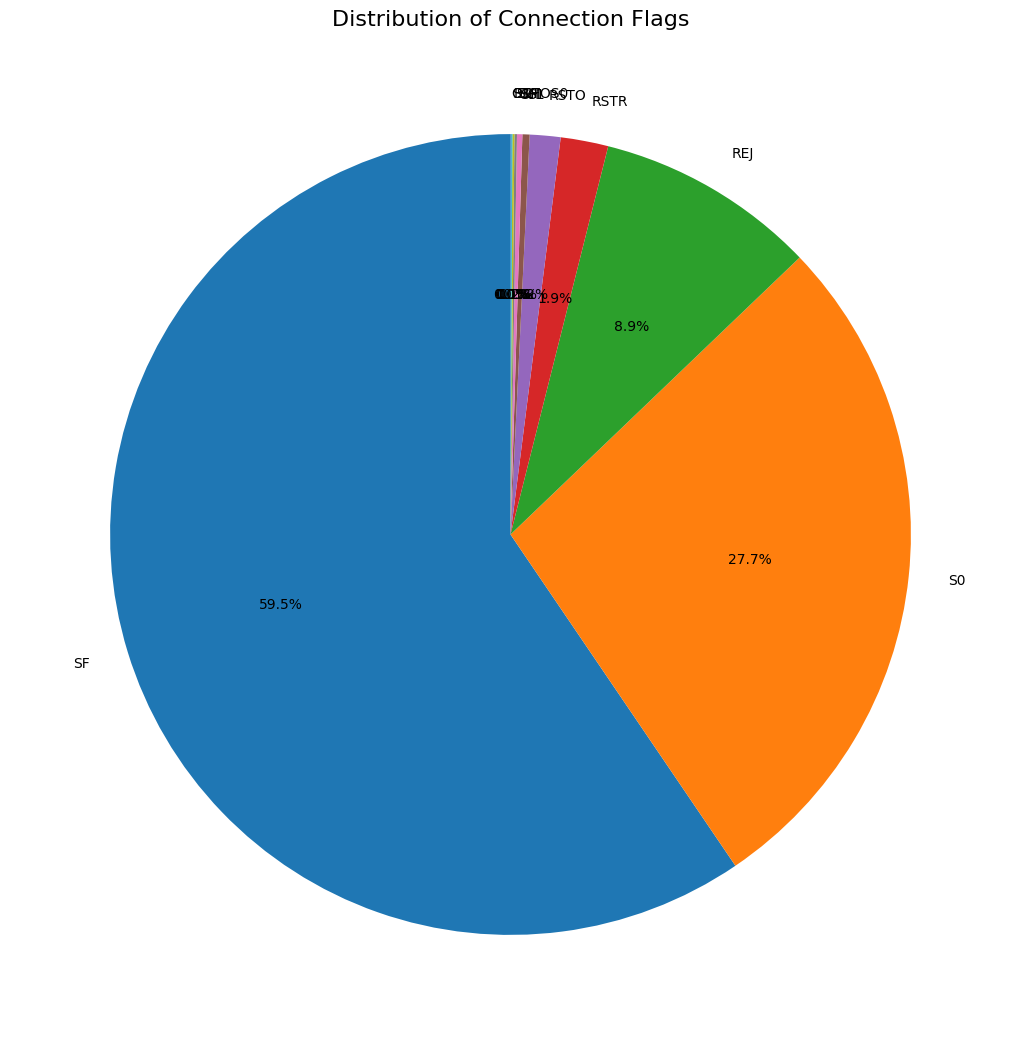

In [ ]:
# Pie chart for 'flag'
flag_counts = train_df['flag'].value_counts()

plt.figure(figsize=(20, 13))
plt.pie(
    flag_counts,
    labels=flag_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('tab10')
)
plt.title('Distribution of Connection Flags', fontsize=16)
plt.ylabel('')
plt.show()
